# Tarea 2

Andrés Lueiza Colipí

## P4

Con lo llegado en la matraca que esta en el PDF, podemos tener una evolución de $\delta$ y $\theta$ en función del factor de escala $a$, las condiciones iniciales a usar son 


$$
\delta(10^{-4})=10^{-3}
$$

$$
\theta(10^{-4})=0
$$

La razón de esta elección viene de que hoy en dia las perturbaciones hoy en dia son altamente no linealess ($\delta>1$), luego como $\rho_m$ decrece como $a^{-3}$, es logico pensar que en $a=10^{-4}$ $\delta$ deberia ir como $10^{-3}$ (como minimo)


In [67]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.integrate import odeint


H0 = 67 # km/s/Mpc
omega_m = 0.3
omega_r=10**-4
omega_de=1-omega_r-omega_r # Asumimos que no hay curvatura

delta_de=10**-3

def EDO(vect,a ,k):
    delta=vect[0]
    theta=vect[1]

    H=H0*np.sqrt(omega_m*a**-3 + omega_r*a**-4 + omega_de)

    # Ecuación que no dire cuanto tiempo me demore en escribirla correctamente

    return np.array([-(2*k**2+9*a**2*H**2)**-1 *(2*k**2*theta/(a**2*H) - 27/2*a**3*H**2/k**2*(theta/a + 3/2*H*(delta+ 3*theta/k**2*a*H)+ delta_de)),-theta/a - 3/2 *H *((delta + 3*theta/k**2*a*H) + delta_de)])

delta0=10**-3
theta0=0

y0=np.array([delta0,theta0])

print(np.shape(y0))

aaa=np.linspace(10**-4 ,1 , 50000)

k1=H0
k2=5*H0
k3=20*H0
k4=200*H0


solution1=odeint(EDO,y0, t=aaa,args=(k1,))
solution2=odeint(EDO,y0, t=aaa,args=(k2,))
solution3=odeint(EDO,y0, t=aaa,args=(k3,))
solution4=odeint(EDO,y0, t=aaa,args=(k4,))

(2,)


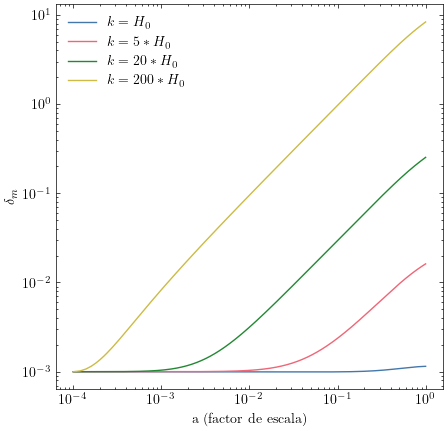

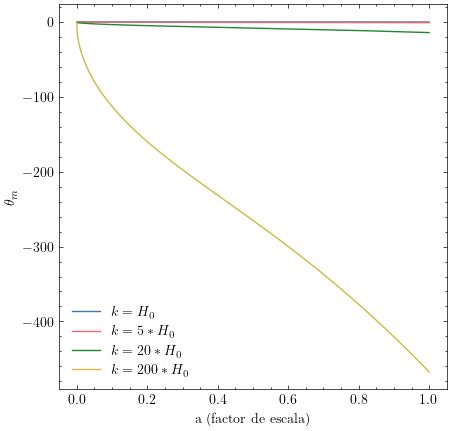

In [68]:
plt.figure(figsize=(5,5))
plt.loglog(aaa, solution1[:,0], label='$k=H_0$')
plt.loglog(aaa, solution2[:,0], label='$k=5*H_0$')
plt.loglog(aaa, solution3[:,0], label='$k=20*H_0$')
plt.loglog(aaa, solution4[:,0], label='$k=200*H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel('$\delta_m$')
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

plt.figure(figsize=(5,5))
plt.plot(aaa, solution1[:,1], label='$k=H_0$')
plt.plot(aaa, solution2[:,1], label='$k=5*H_0$')
plt.plot(aaa, solution3[:,1], label='$k=20*H_0$')
plt.plot(aaa, solution4[:,1], label='$k=200*H_0$')
plt.xlabel('a (factor de escala)')
plt.ylabel(r'$\theta_m$')
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

Notemos que las perturbaciones con $k$ menores se ''activan'' despues, puesto que estas son mayores escalas, por lo que entran en el horizonte causal despues que las perturbaciones de menores escalas, ademas las perturbaciones hoy dia se vuelven no lineales como se menciono al inicio, en se caso habria que considerar otra ecuaciones paa los regimenes no lineales, asi que no es valida la solución para esos valores de $\delta$, pero nos sirve como guia para saber que ocurre con las perturbaciones.

# P5

Matter power spectrum

In [69]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)


class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [70]:
z_max=5000
z_min=0

redshifts=np.arange(z_min,z_max,z_max//5)

redshifts

# Set Matter Power Spectrum

pars.set_matter_power(redshifts=redshifts, kmax=1) # Grandes escalas 

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


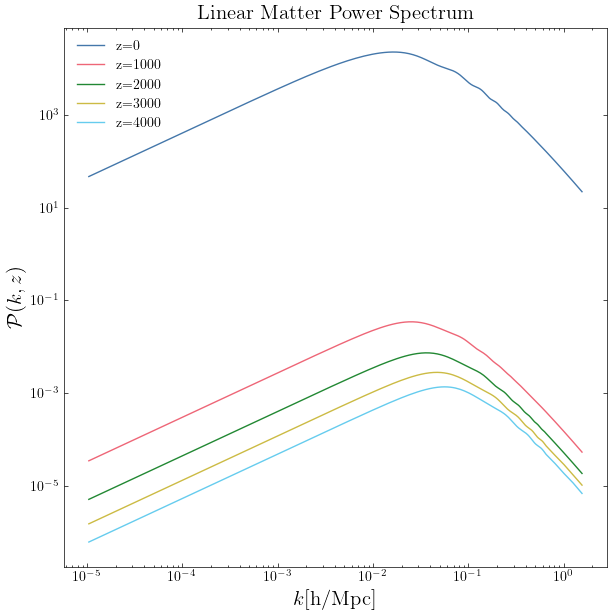

In [71]:
# Get matter power spectrum

kh, z, PK=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(7,7))
plt.loglog(kh,PK[0,:],label='z=' + str(redshifts[0]))
plt.loglog(kh,PK[1,:],label='z=' + str(redshifts[1]))
plt.loglog(kh,PK[2,:],label='z=' + str(redshifts[2]))
plt.loglog(kh,PK[3,:],label='z=' + str(redshifts[3]))
plt.loglog(kh,PK[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()



Ahora le damos con el no lineal

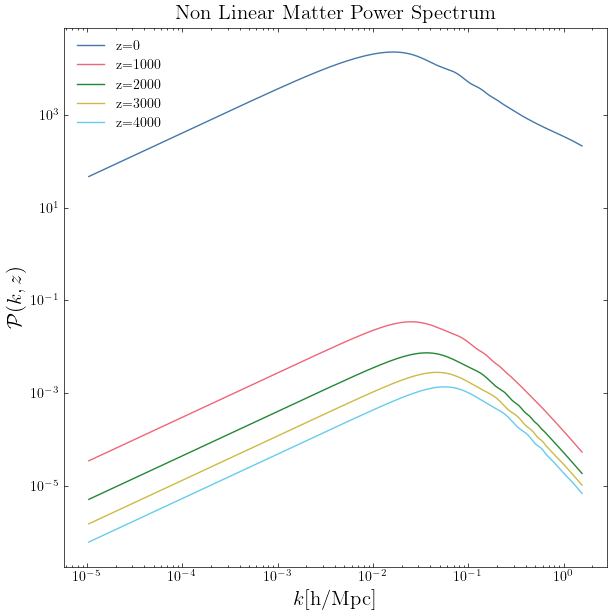

In [72]:
# Non lineal matter power spectrum

khnl, znl, PKnl=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnl,PKnl[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khnl,PKnl[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khnl,PKnl[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khnl,PKnl[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khnl,PKnl[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()



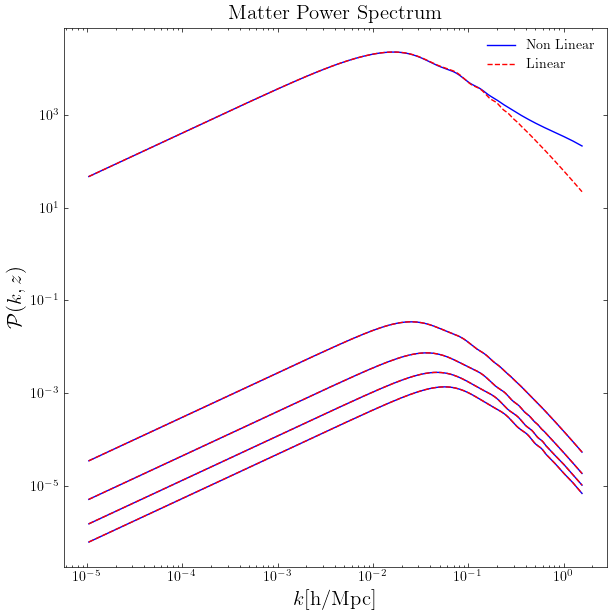

In [73]:
# Get comparación del lineal con el no lineal

plt.figure(figsize=(7,7))
plt.loglog(khnl,PKnl[0,:],label='Non Linear',c='blue')
plt.loglog(khnl,PKnl[1,:],c='blue')
plt.loglog(khnl,PKnl[2,:],c='blue')
plt.loglog(khnl,PKnl[3,:],c='blue')
plt.loglog(khnl,PKnl[4,:],c='blue')
plt.loglog(kh,PK[0,:],c='red' ,linestyle='dashed', label='Linear')
plt.loglog(kh,PK[1,:],c='red' ,linestyle='dashed')
plt.loglog(kh,PK[2,:],c='red',linestyle='dashed')
plt.loglog(kh,PK[3,:],c='red',linestyle='dashed')
plt.loglog(kh,PK[4,:],c='red',linestyle='dashed')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()


Ahora veamos que pasa si ponemos los neutrinos a 0

In [74]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

H0 = 67.4 # km/s/Mpc
omega_m = 0.315 
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0, num_massive_neutrinos=0) # Omega_nu=0




class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.0
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 3.044
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 0.0
   nrunrun = 0.0
   nt = -0.0
   ntrun = -0.0
  

In [75]:
z_max=5000
z_min=0

redshifts=np.arange(z_min,z_max,z_max//5)

redshifts

# Set Matter Power Spectrum

pars.set_matter_power(redshifts=redshifts, kmax=1) #Grandes escalas 

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


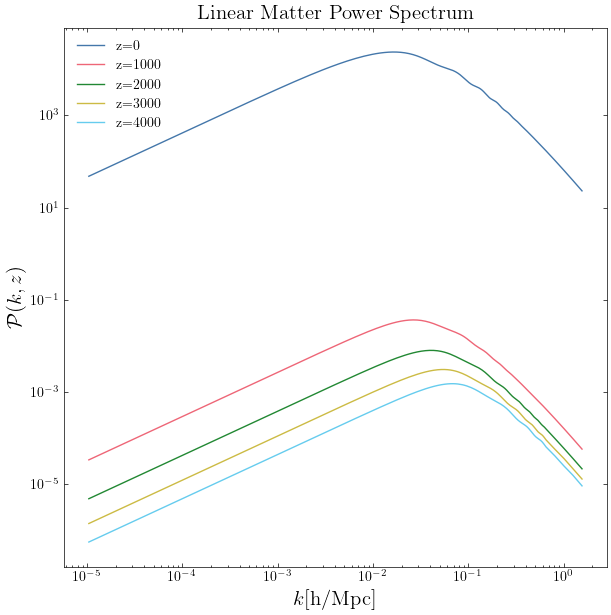

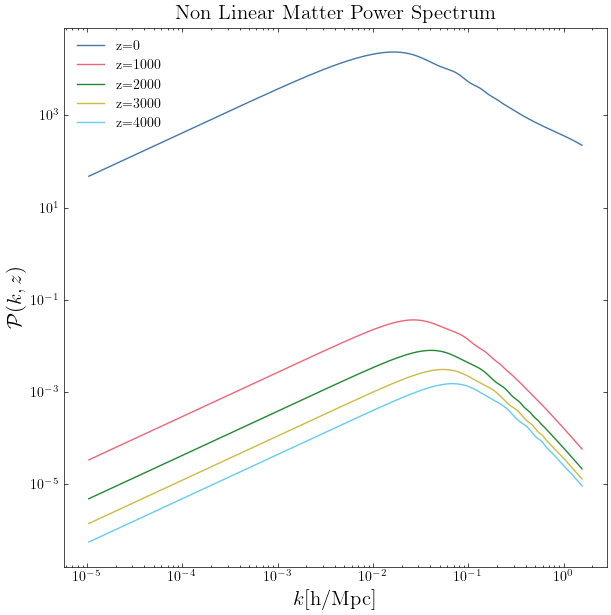

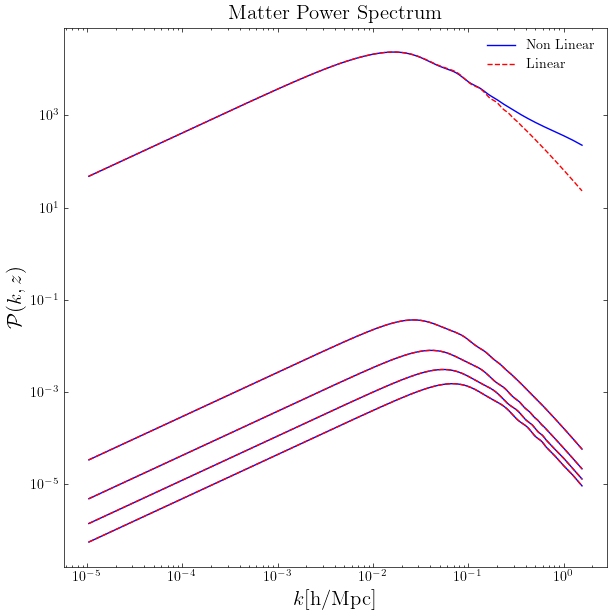

In [76]:
# Lineal

khn, zn, PKn=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(7,7))
plt.loglog(khn,PKn[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khn,PKn[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khn,PKn[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khn,PKn[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khn,PKn[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

# No lineal

khnln, znln, PKnln=results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True,nonlinear=True)


plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khnln,PKnln[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khnln,PKnln[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khnln,PKnln[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khnln,PKnln[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

# Comparamos el lineal con el no lineal

plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:],label='Non Linear',c='blue')
plt.loglog(khnln,PKnln[1,:],c='blue')
plt.loglog(khnln,PKnln[2,:],c='blue')
plt.loglog(khnln,PKnln[3,:],c='blue')
plt.loglog(khnln,PKnln[4,:],c='blue')
plt.loglog(khn,PKn[0,:],c='red' ,linestyle='dashed', label='Linear')
plt.loglog(khn,PKn[1,:],c='red' ,linestyle='dashed')
plt.loglog(khn,PKn[2,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[3,:],c='red',linestyle='dashed')
plt.loglog(khn,PKn[4,:],c='red',linestyle='dashed')
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel('$\mathcal{P}(k,z)$',fontsize=15)
plt.title('Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()



Para ver mas claro el efecto de los neutrinos masivos en el matter power spectrum, dividiremos ambos espectros de potencia

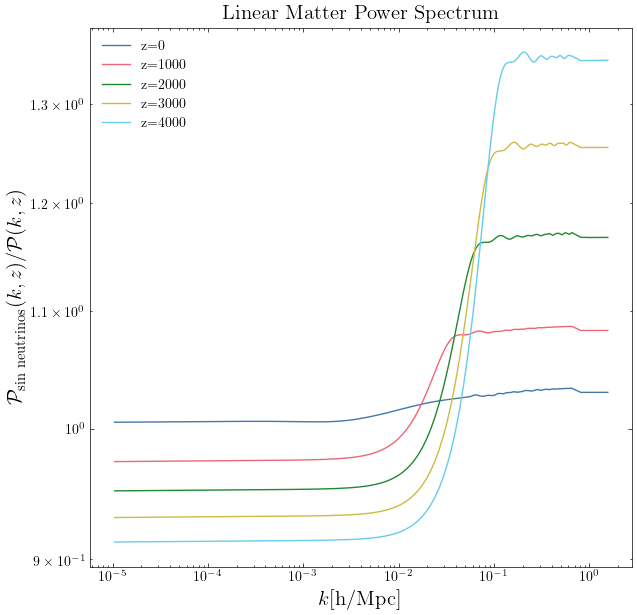

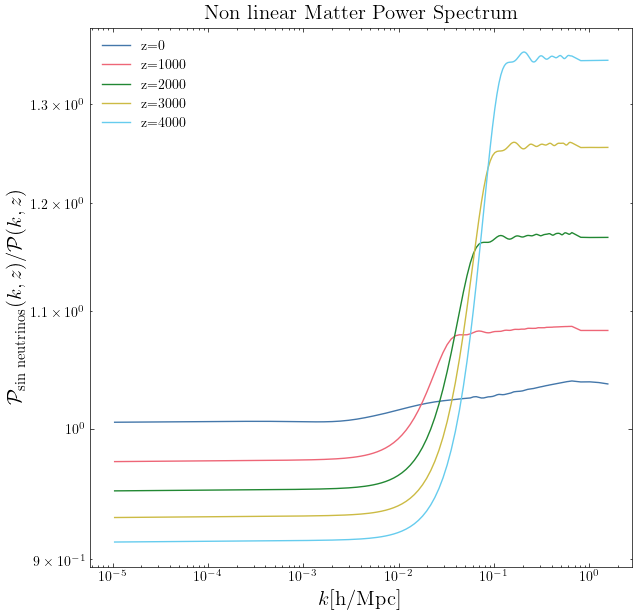

In [77]:
plt.figure(figsize=(7,7))
plt.loglog(khn,PKn[0,:]/PK[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khn,PKn[1,:]/PK[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khn,PKn[2,:]/PK[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khn,PKn[3,:]/PK[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khn,PKn[4,:]/PK[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

plt.figure(figsize=(7,7))
plt.loglog(khnln,PKnln[0,:]/PKnl[0,:],label='z=' + str(redshifts[0]))
plt.loglog(khnln,PKnln[1,:]/PKnl[1,:],label='z=' + str(redshifts[1]))
plt.loglog(khnln,PKnln[2,:]/PKnl[2,:],label='z=' + str(redshifts[2]))
plt.loglog(khnln,PKnln[3,:]/PKnl[3,:],label='z=' + str(redshifts[3]))
plt.loglog(khnln,PKnln[4,:]/PKnl[4,:],label='z=' + str(redshifts[4]))
plt.xlabel('$k$[h/Mpc]',fontsize=15)
plt.ylabel(r'$\mathcal{P}_{\text{sin neutrinos}}(k,z)/\mathcal{P}(k,z)$',fontsize=15)
plt.title('Non linear Matter Power Spectrum',fontsize=15)
plt.legend()
plt.style.use(['science', 'bright'])
plt.show()

Notamos entocnces que el efecto de los neutrinos masivos en el matter power spectrum esta principalme nte en las pequeñas escalas ($k$ grande), ademas este efecto se ve intensificado en redshifts altos

La razón de esto, es que al desacolplarse lo neutrinos del baño termico, estos pueden actuar de forma mas libre, y asi salirse de las regiones de alta densidad, a regiones de menor densidad, asi aumentando el matter power spectrum en las escalas pequeñas ($k$ grande), y disminuyendo en las escalas grandes ($k$ grande), asi explicando la diferencia encontrada.

# P6

In [78]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054
omk=0

# Creamos un objeto donde guardaremos los parámetros cosmológicos

pars = camb.CAMBparams()

# Variaremos el parametro de curvatura

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk-0.07, tau=tau)

powers1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(1)

unlensedCL1=powers1['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk -0.03, tau=tau)

powers2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(2)

unlensedCL2=powers2['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk , tau=tau)

powers3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(3)

unlensedCL3=powers3['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk +0.03, tau=tau)

powers4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(4)

unlensedCL4=powers4['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk +0.07, tau=tau)

powers5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=powers5['unlensed_scalar']

print(5)




1
2
3
4
5


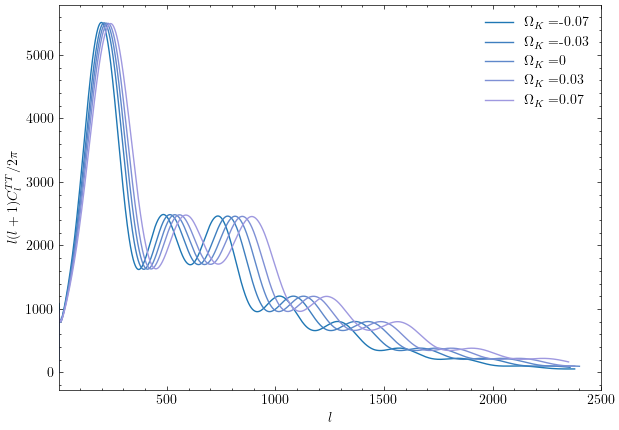

In [79]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ['#1f77b4', '#3f7fbf', '#5f88ca', '#7f90d5', '#9f99e0']  # Gradiente suave de azul a morado

plt.figure(figsize=(7,5))
plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_K=$' + str(omk-0.07))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_K=$' + str(omk-0.03))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_K=$' + str(omk))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_K=$' + str(omk+0.03))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_K=$' + str(omk+0.07))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()


Al crecer el parametro de curvatura, los peaks del angular power spectrum se van hacia la derecha, esto tiene sentido pues, al subir el parametro de curvatura estamos haciendo al universo mas abierto, y en ese caso las geodesicas divergen, esto hace que la perturbaciones en LSS aparezcan en escalas menores a comparación del universo euclideo (tendrian menos separación angular), lo opuesto pasaria en un universo que sea cerrado, asi se explica los angular power spectrum obtenidos.

In [80]:
# Variaremos el parametro de curvatura

pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.004, omch2=omega_ch2, omk=omk, tau=tau)

powers1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(1)

unlensedCL1=powers1['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.01, omch2=omega_ch2, omk=omk, tau=tau)

powers2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(2)

unlensedCL2=powers2['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk, tau=tau)

powers3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(3)

unlensedCL3=powers3['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.005, omch2=omega_ch2, omk=omk, tau=tau)

powers4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(4)

unlensedCL4=powers4['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.01, omch2=omega_ch2, omk=omk, tau=tau)

powers5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=powers5['unlensed_scalar']

print(5)




1
2
3
4
5


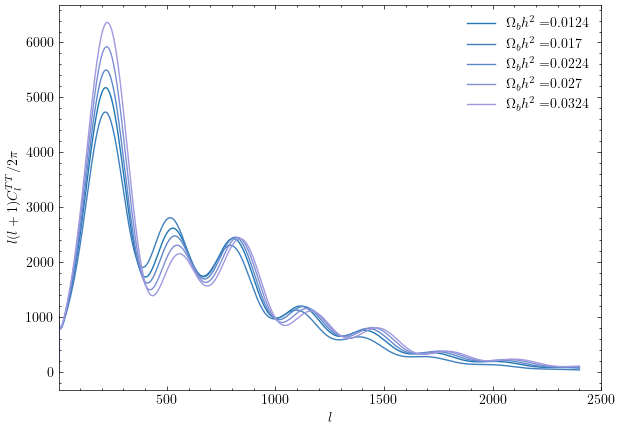

In [81]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ['#1f77b4', '#3f7fbf', '#5f88ca', '#7f90d5', '#9f99e0']  # Gradiente suave de azul a morado

plt.figure(figsize=(7,5))

plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label='$\Omega_bh^2=$' + str(omega_bh2-0.01))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label='$\Omega_bh^2=$' + str(round(omega_bh2-0.005,3)))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label='$\Omega_bh^2=$' + str(omega_bh2))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label='$\Omega_bh^2=$' + str(round(omega_bh2+0.005,3)))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label='$\Omega_bh^2=$' + str(omega_bh2+0.01))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()


Notamos que al cambiar los bariones los peaks del angular power spectrum cambian su posición, como su intensidad, un primer efecto a notas en la amplificación del primer peak al aumentar $\Omega_b h^2$.

Al aumentar $\Omega_b h^2$ se observa un corrimiento a la derecha (pequeñas escalas), esto debido a que $\Omega_b$ biene relacionado con la velocidad del sonido, y por ende con la frecuencia de las oscilaciones, al aumentar $\Omega_bh^2$ se baja la frecuencia, asi llevando los peaks a grandes $l$.

El pruimer peak aumenta al aumentar $\Omega_bh^2$ ya que mas densidad de bariones permiten un mayor colapso gravitacional, el segundo peak baja ya que corresponde a una rarefacción, ya que al haber una gran cantidad de bariones, rapidamente la materia quiere colapsar, impidiendo la rarefacción.

In [86]:
# Variaremos el parametro de curvatura

pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.005, omch2=omega_ch2-0.05, omk=omk, tau=tau)

powers1 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(1)

unlensedCL1=powers1['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2-0.0025, omch2=omega_ch2-0.025, omk=omk, tau=tau)

powers2 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(2)

unlensedCL2=powers2['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, omk=omk, tau=tau)

powers3 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(3)

unlensedCL3=powers3['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.0025, omch2=omega_ch2+0.025, omk=omk, tau=tau)

powers4 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

print(4)

unlensedCL4=powers4['unlensed_scalar']

#-------------------------------------------------------------------------------------------

pars.set_cosmology(H0=H0, ombh2=omega_bh2+0.005, omch2=omega_ch2+0.05, omk=omk, tau=tau)

powers5 = results.get_cmb_power_spectra(pars,CMB_unit='muK')

unlensedCL5=powers5['unlensed_scalar']

print(5)




1
2
3
4
5


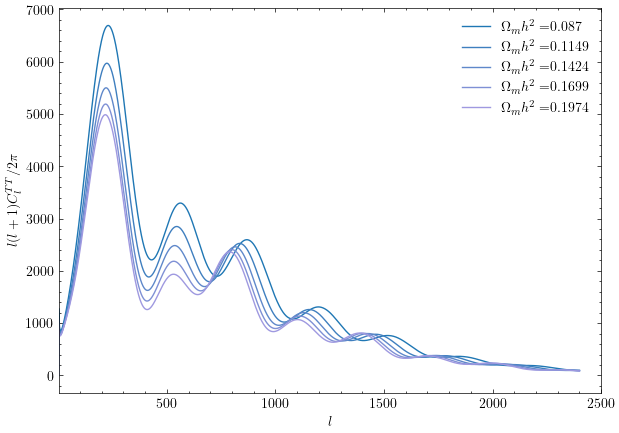

In [87]:
ells1=np.arange(unlensedCL1[:,0].shape[0])
ells2=np.arange(unlensedCL2[:,0].shape[0])
ells3=np.arange(unlensedCL3[:,0].shape[0])
ells4=np.arange(unlensedCL4[:,0].shape[0])
ells5=np.arange(unlensedCL5[:,0].shape[0])

colors = ['#1f77b4', '#3f7fbf', '#5f88ca', '#7f90d5', '#9f99e0']  # Gradiente suave de azul a morado

plt.figure(figsize=(7,5))

plt.plot(ells1, unlensedCL1[:,0], color=colors[0], label=r'$\Omega_mh^2=$' + str(round(omega_bh2+omega_ch2-0.055,3)))
plt.plot(ells2, unlensedCL2[:,0], color=colors[1], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2-0.0275))
plt.plot(ells3, unlensedCL3[:,0], color=colors[2], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2))
plt.plot(ells4, unlensedCL4[:,0], color=colors[3], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2+0.0275))
plt.plot(ells5, unlensedCL5[:,0], color=colors[4], label=r'$\Omega_mh^2=$' + str(omega_bh2+omega_ch2+0.055))
plt.legend()
plt.style.use(['science', 'bright'])
plt.xlim(2, 2500)
plt.ylabel('$l(l+1)C_l^{TT}/2\pi$')
plt.xlabel('$l$')
plt.show()


Notamos que al aumentar la densidad de materia los peaks del angular power spectrum se amortiguan, lo que se explica por el mayor potencial gravitacional que sentiria la materia, lo que reduce el BAO.